<a href="https://colab.research.google.com/github/VivekKejriwal/TheSchoolOfAI/blob/main/Assignment_9/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime

In [2]:
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2021-02-06 18:16:47.885895


In [3]:
!rm -rf TheSchoolOfAI/
!git clone https://github.com/VivekKejriwal/TheSchoolOfAI
%cd TheSchoolOfAI/models

Cloning into 'TheSchoolOfAI'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 202 (delta 86), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (202/202), 1.14 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/TheSchoolOfAI/models


In [4]:
!pip install git+https://github.com/albumentations-team/albumentations.git
from data_engine import DataEngine
from trainer import Trainer
import torch
from utils import *
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from resnet import ResNet18
from validationplots import *
from Albumentations import *
from GradCam import *


  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-yyshxdrp
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-yyshxdrp
     |████████████████████████████████| 952kB 10.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.5.2-cp36-none-any.whl size=81845 sha256=e8734e925ab8342b735d1b911c88e0d29af93ce72e4da84af2ecb234ae8a3154
  Stored in directory: /tmp/pip-ephem-wheel-cache-pgo25hn4/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [5]:
from QuizDNN import QuizDNN

In [6]:
transform_album = album_compose()



# View model config
args = ModelConfig(transform_album)
args.print_config()

print()
# Set seed
init_seed(args)



Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 128,
  'dropout_value': 0.1,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1,
  'train_transform': <Albumentations.album_compose object at 0x7facee7d0748>}

CUDA Available


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


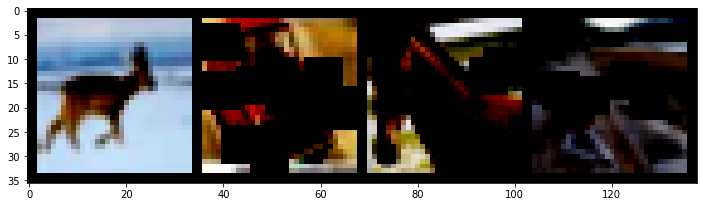

In [7]:
data = DataEngine(args)

# get some random training images
dataiter = iter(data.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % data.classes[labels[j]] for j in range(4)))

In [8]:
device = which_device()
model = QuizDNN().to(device)
show_model_summary(model, device, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 64,

In [9]:
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=8, gamma=0.1)


trainer = Trainer(model, 
                  device,
                  train_loader=data.train_loader, 
                  test_loader = data.test_loader, 
                  optimizer = optimizer, 
                  loss_func = criterion, 
                  lr_scheduler = None)


(train_loss, train_acc, test_loss, test_acc) = trainer.train_model(epochs=40, lambda_l1=0.0001)



  0%|          | 0/391 [00:00<?, ?it/s]


Current EPOCH: 0


Train set: Loss=2.9133174419403076 Batch_id=390 Accuracy=24.53: 100%|██████████| 391/391 [00:24<00:00, 15.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0153, Accuracy: 2529/10000 (25.29%)


Current EPOCH: 1


Train set: Loss=2.776040554046631 Batch_id=390 Accuracy=32.91: 100%|██████████| 391/391 [00:24<00:00, 16.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 2671/10000 (26.71%)


Current EPOCH: 2


Train set: Loss=2.6834933757781982 Batch_id=390 Accuracy=36.96: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 2696/10000 (26.96%)


Current EPOCH: 3


Train set: Loss=2.476773977279663 Batch_id=390 Accuracy=40.20: 100%|██████████| 391/391 [00:24<00:00, 16.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 2676/10000 (26.76%)


Current EPOCH: 4


Train set: Loss=2.4793288707733154 Batch_id=390 Accuracy=42.99: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 3160/10000 (31.60%)


Current EPOCH: 5


Train set: Loss=2.4688704013824463 Batch_id=390 Accuracy=44.95: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 3115/10000 (31.15%)


Current EPOCH: 6


Train set: Loss=2.1911375522613525 Batch_id=390 Accuracy=46.93: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0147, Accuracy: 3661/10000 (36.61%)


Current EPOCH: 7


Train set: Loss=2.2821414470672607 Batch_id=390 Accuracy=48.41: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0144, Accuracy: 3698/10000 (36.98%)


Current EPOCH: 8


Train set: Loss=1.839524269104004 Batch_id=390 Accuracy=49.95: 100%|██████████| 391/391 [00:23<00:00, 16.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 4194/10000 (41.94%)


Current EPOCH: 9


Train set: Loss=2.191732883453369 Batch_id=390 Accuracy=51.25: 100%|██████████| 391/391 [00:23<00:00, 16.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0126, Accuracy: 4246/10000 (42.46%)


Current EPOCH: 10


Train set: Loss=2.078184127807617 Batch_id=390 Accuracy=52.21: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 4837/10000 (48.37%)


Current EPOCH: 11


Train set: Loss=2.0518581867218018 Batch_id=390 Accuracy=53.21: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 4793/10000 (47.93%)


Current EPOCH: 12


Train set: Loss=1.9227428436279297 Batch_id=390 Accuracy=54.13: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 5000/10000 (50.00%)


Current EPOCH: 13


Train set: Loss=1.7413780689239502 Batch_id=390 Accuracy=55.29: 100%|██████████| 391/391 [00:24<00:00, 16.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 4878/10000 (48.78%)


Current EPOCH: 14


Train set: Loss=1.9364867210388184 Batch_id=390 Accuracy=55.94: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5267/10000 (52.67%)


Current EPOCH: 15


Train set: Loss=1.9746001958847046 Batch_id=390 Accuracy=56.89: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 5031/10000 (50.31%)


Current EPOCH: 16


Train set: Loss=1.9948663711547852 Batch_id=390 Accuracy=57.74: 100%|██████████| 391/391 [00:24<00:00, 16.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5533/10000 (55.33%)


Current EPOCH: 17


Train set: Loss=1.877027988433838 Batch_id=390 Accuracy=58.43: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 5525/10000 (55.25%)


Current EPOCH: 18


Train set: Loss=1.5859761238098145 Batch_id=390 Accuracy=59.01: 100%|██████████| 391/391 [00:24<00:00, 16.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5643/10000 (56.43%)


Current EPOCH: 19


Train set: Loss=1.7309658527374268 Batch_id=390 Accuracy=59.85: 100%|██████████| 391/391 [00:23<00:00, 16.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 5754/10000 (57.54%)


Current EPOCH: 20


Train set: Loss=1.990356206893921 Batch_id=390 Accuracy=60.19: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 5581/10000 (55.81%)


Current EPOCH: 21


Train set: Loss=1.7065153121948242 Batch_id=390 Accuracy=60.72: 100%|██████████| 391/391 [00:23<00:00, 16.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 5965/10000 (59.65%)


Current EPOCH: 22


Train set: Loss=1.7697818279266357 Batch_id=390 Accuracy=61.29: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5618/10000 (56.18%)


Current EPOCH: 23


Train set: Loss=1.6521159410476685 Batch_id=390 Accuracy=61.78: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6360/10000 (63.60%)


Current EPOCH: 24


Train set: Loss=1.6133732795715332 Batch_id=390 Accuracy=62.24: 100%|██████████| 391/391 [00:23<00:00, 16.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6140/10000 (61.40%)


Current EPOCH: 25


Train set: Loss=1.6433348655700684 Batch_id=390 Accuracy=62.62: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 6066/10000 (60.66%)


Current EPOCH: 26


Train set: Loss=1.5433366298675537 Batch_id=390 Accuracy=62.97: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6313/10000 (63.13%)


Current EPOCH: 27


Train set: Loss=1.8143683671951294 Batch_id=390 Accuracy=63.39: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6222/10000 (62.22%)


Current EPOCH: 28


Train set: Loss=1.518295407295227 Batch_id=390 Accuracy=64.19: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6317/10000 (63.17%)


Current EPOCH: 29


Train set: Loss=1.6528255939483643 Batch_id=390 Accuracy=64.20: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6487/10000 (64.87%)


Current EPOCH: 30


Train set: Loss=1.373241901397705 Batch_id=390 Accuracy=64.70: 100%|██████████| 391/391 [00:23<00:00, 16.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6509/10000 (65.09%)


Current EPOCH: 31


Train set: Loss=1.4888975620269775 Batch_id=390 Accuracy=64.97: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6557/10000 (65.57%)


Current EPOCH: 32


Train set: Loss=1.2032227516174316 Batch_id=390 Accuracy=65.25: 100%|██████████| 391/391 [00:23<00:00, 16.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 6884/10000 (68.84%)


Current EPOCH: 33


Train set: Loss=1.5018898248672485 Batch_id=390 Accuracy=65.73: 100%|██████████| 391/391 [00:23<00:00, 16.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6819/10000 (68.19%)


Current EPOCH: 34


Train set: Loss=1.4110126495361328 Batch_id=390 Accuracy=65.84: 100%|██████████| 391/391 [00:24<00:00, 16.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6757/10000 (67.57%)


Current EPOCH: 35


Train set: Loss=1.2821016311645508 Batch_id=390 Accuracy=66.19: 100%|██████████| 391/391 [00:23<00:00, 16.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7028/10000 (70.28%)


Current EPOCH: 36


Train set: Loss=1.3094456195831299 Batch_id=390 Accuracy=66.73: 100%|██████████| 391/391 [00:24<00:00, 16.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6727/10000 (67.27%)


Current EPOCH: 37


Train set: Loss=1.3424402475357056 Batch_id=390 Accuracy=67.05: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6684/10000 (66.84%)


Current EPOCH: 38


Train set: Loss=1.2838644981384277 Batch_id=390 Accuracy=67.13: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7151/10000 (71.51%)


Current EPOCH: 39


Train set: Loss=1.3203506469726562 Batch_id=390 Accuracy=67.81: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]



Test set: Average loss: 0.0068, Accuracy: 6886/10000 (68.86%)

